# Predicting new images

## Prediction of new image files using trained image classification model.

In [ ]:
!pip install numpy pandas matplotlib requests tqdm opencv-python pillow -i https://pypi.tuna.tsinghua.edu.cn/simple

In [13]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


In [ ]:
# Install mmcv -full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html


## Import Toolkit and Load category

In [277]:
import os

In [279]:
# Store test images
os.mkdir('test_img')

# Storing the results file
os.mkdir('output')

# Stores the weights of the trained model
os.mkdir('checkpoint')

In [280]:
idx_to_labels = np.load('/home/featurize/idx_to_labels.npy', allow_pickle=True).item()

In [281]:
idx_to_labels

{0: 'CherryTomatoes',
 1: 'Mangosteen',
 2: 'MomordicaCharantia',
 3: 'NavelOrange',
 4: 'Sandsugaroranges',
 5: 'apple',
 6: 'banana',
 7: 'carrot',
 8: 'cherries',
 9: 'cucumber',
 10: 'durian',
 11: 'grape',
 12: 'hamimelon',
 13: 'kiwi',
 14: 'lemon',
 15: 'lichee',
 16: 'longan',
 17: 'mango',
 18: 'pear',
 19: 'pineapple',
 20: 'pitaya',
 21: 'pomegranate',
 22: 'strawberry',
 23: 'tomato',
 24: 'watermelon'}

In [306]:
import cv2
img_cv   = cv2.imread("/home/featurize/test_img/banana1.jpg")#retrieve data
img_cv   = cv2.imread("/home/featurize/test_img/carrot1.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/carrot2.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/carrot3.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/watermelon1.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/durian.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/durian1.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/durian2.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/lenmon2.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/mango1.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/strawberry.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/tomato1.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/strawberry1.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/watermelon2.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/cucumber.jpg")
img_cv   = cv2.imread("/home/featurize/test_img/cucumber1.jpg")

In [307]:
import os

import cv2

import pandas as pd
import numpy as np

import torch

import matplotlib.pyplot as plt
%matplotlib inline

##  computing device

In [308]:
# GPU if you have one, CPU if you don't.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [309]:
device

device(type='cuda', index=0)

## Import the trained model

In [ ]:
from torchvision import models

In [314]:
model = torch.load('/home/featurize/fruittestpytorch/best-0.675.pth')
model = model.eval().to(device)

## Pre-processing

In [283]:
from torchvision import transforms
# Test Set Image Preprocessing - RCTN: Scaling, Cropping, Turn Tensor, Normalisation
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

## Load a test image

In [316]:
from PIL import Image

In [317]:
#img_path = '/home/featurize/test_img/banana1.jpg'
#img_path = '/home/featurize/test_img/carrot1.jpg'
#img_path = '/home/featurize/test_img/carrot2.jpg'
#img_path = '/home/featurize/test_img/carrot3.jpg'
#img_path = '/home/featurize/test_img/watermelon1.jpg'
#img_path = '/home/featurize/test_img/durian.jpg'
#img_path = '/home/featurize/test_img/durian1.jpg'
#img_path = '/home/featurize/test_img/durian2.jpg'
#img_path = '/home/featurize/test_img/lenmon2.jpg'
#img_path ='/home/featurize/test_img/mango1.jpg'
#img_path = '/home/featurize/test_img/strawberry.jpg'
img_path = '/home/featurize/test_img/tomato1.jpg'
#img_path = "/home/featurize/test_img/strawberry1.jpg'
#img_path = '/home/featurize/test_img/watermelon2.jpg'
#img_path = '/home/featurize/test_img/cucumber.jpg'
#img_path ='/home/featurize/test_img/cucumber1.jpg'

In [318]:
img_pil = Image.open(img_path)

In [319]:
np.array(img_pil).shape

(1067, 1600, 3)

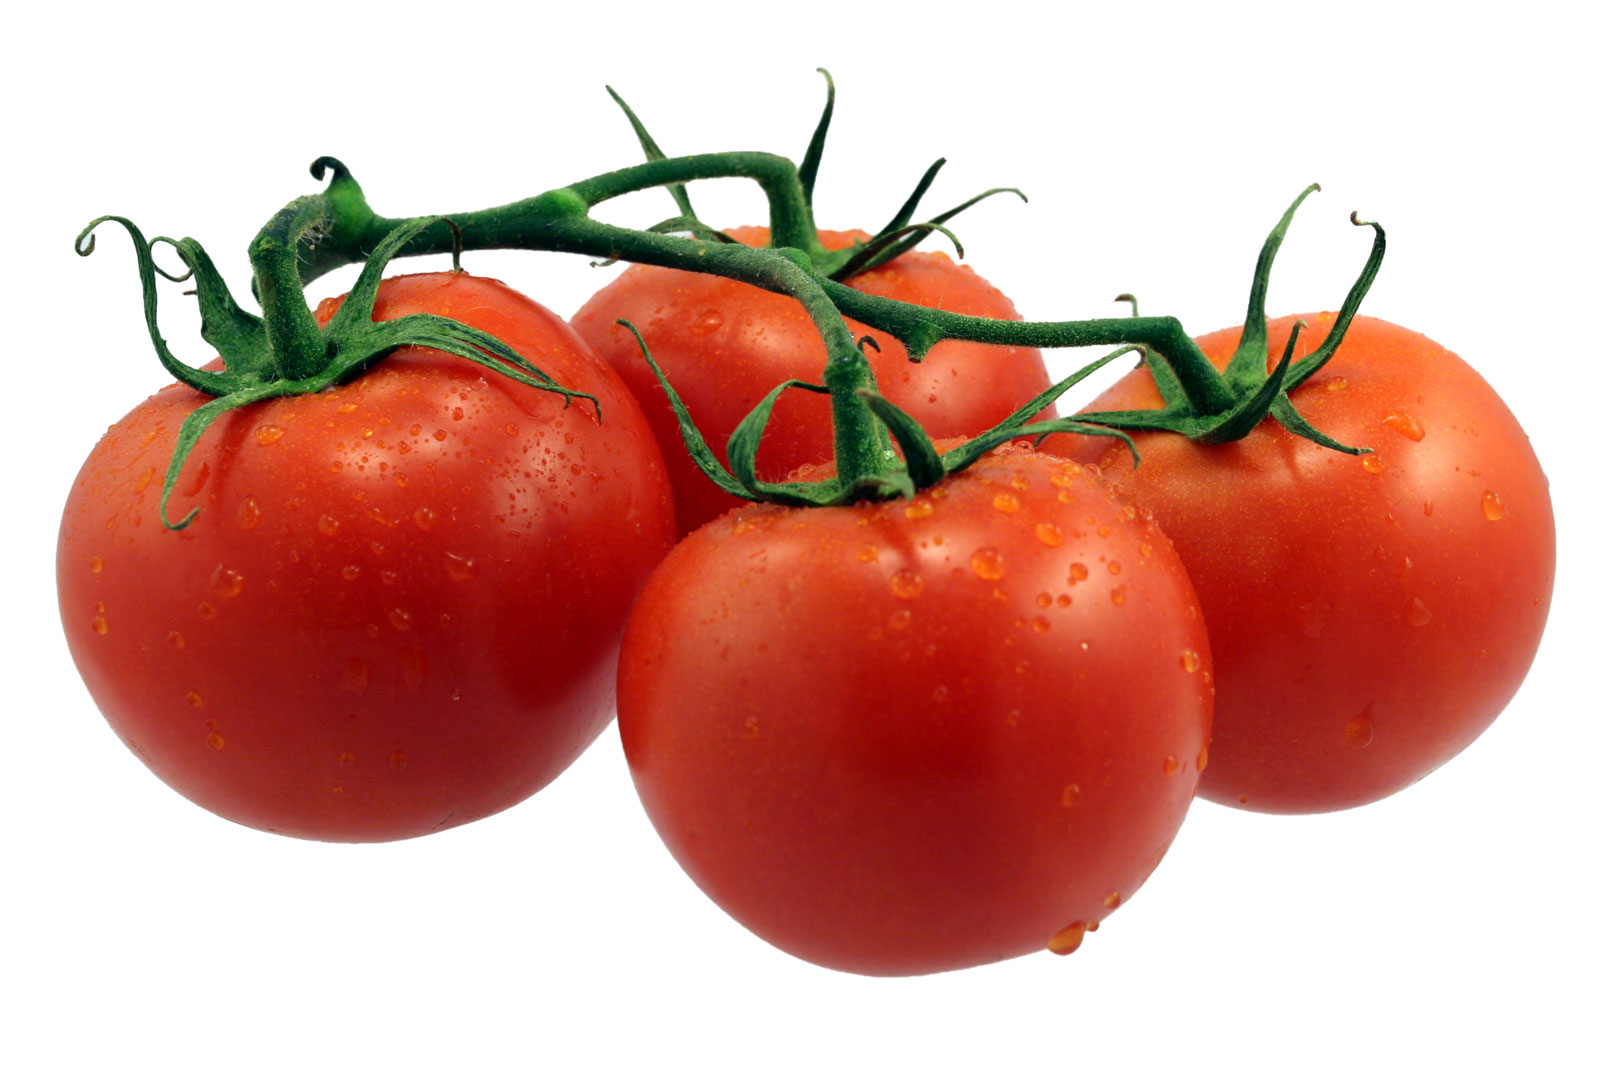

In [320]:
img_pil

## Pre-processing, forward projection

In [321]:
input_img = test_transform(img_pil) # preprocessing

In [322]:
input_img.shape

torch.Size([3, 224, 224])

In [323]:
input_img = input_img.unsqueeze(0).to(device)

In [324]:
input_img.shape

torch.Size([1, 3, 224, 224])

In [325]:
# Perform forward prediction to get logit prediction scores for all categories
pred_logits = model(input_img) 

In [326]:
pred_logits

tensor([[ 2.7197, -6.5022, -5.4831, -0.2764,  1.9642, -2.0090, -5.9099,  1.3607,
         -4.4711, -8.4817, -5.9957, -2.8411, -4.5781, -9.3885, -6.6772, -1.6307,
         -4.8560, -1.9126, -5.2103, -6.5983, -6.0284,  1.5787,  0.5504,  5.1925,
          0.0202]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [327]:
import torch.nn.functional as F
pred_softmax = F.softmax(pred_logits, dim=1) # Doing softmax on logit scores

In [328]:
pred_softmax

tensor([[7.0566e-02, 6.9754e-06, 1.9327e-05, 3.5271e-03, 3.3149e-02, 6.2364e-04,
         1.2612e-05, 1.8129e-02, 5.3167e-05, 9.6355e-07, 1.1576e-05, 2.7138e-04,
         4.7773e-05, 3.8908e-07, 5.8558e-06, 9.1042e-04, 3.6182e-05, 6.8677e-04,
         2.5388e-05, 6.3359e-06, 1.1203e-05, 2.2546e-02, 8.0628e-03, 8.3655e-01,
         4.7448e-03]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

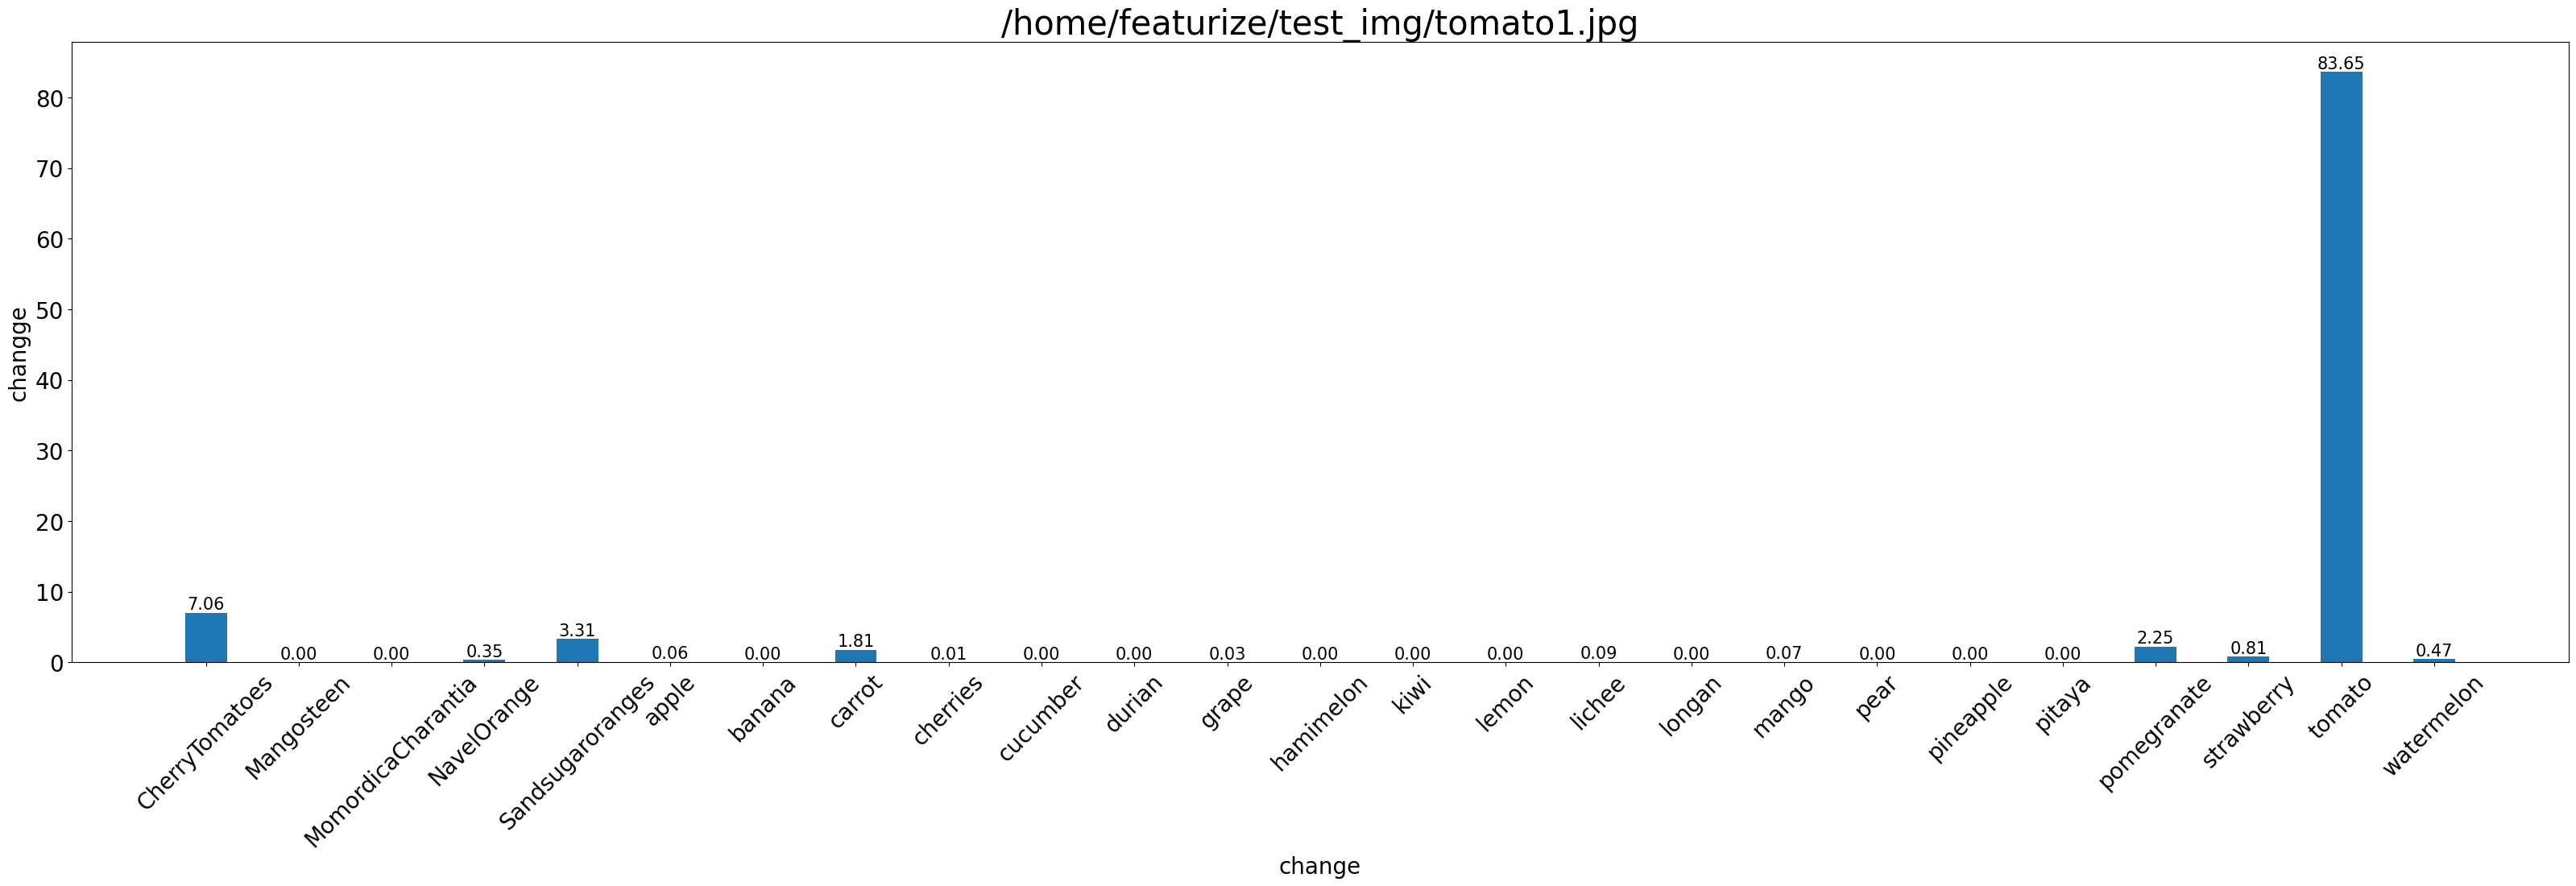

In [329]:
plt.figure(figsize=(40, 10))

x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
width = 0.45 # Histogram width

ax = plt.bar(x, y, width)

plt.bar_label(ax, fmt='%.2f', fontsize=15) # confidence level (math.)
plt.tick_params(labelsize=20) # Set coordinate text size

plt.title(img_path, fontsize=30)
plt.xticks(rotation=45) # Horizontal axis text rotation
plt.xlabel('change', fontsize=20)
plt.ylabel('changge', fontsize=20)
plt.show()

## The first n results with the highest confidence level

In [330]:
n = 10
top_n = torch.topk(pred_softmax, n)

In [331]:
top_n

torch.return_types.topk(
values=tensor([[8.3655e-01, 7.0566e-02, 3.3149e-02, 2.2546e-02, 1.8129e-02, 8.0628e-03,
         4.7448e-03, 3.5271e-03, 9.1042e-04, 6.8677e-04]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[23,  0,  4, 21,  7, 22, 24,  3, 15, 17]], device='cuda:0'))

In [332]:
# Parsing out categories
pred_ids = top_n[1].cpu().detach().numpy().squeeze()

In [333]:
pred_ids

array([23,  0,  4, 21,  7, 22, 24,  3, 15, 17])

In [334]:
# resolve the confidence level (math.)
confs = top_n[0].cpu().detach().numpy().squeeze()

In [335]:
confs

array([8.3654517e-01, 7.0566036e-02, 3.3149406e-02, 2.2546228e-02,
       1.8128648e-02, 8.0627725e-03, 4.7447821e-03, 3.5271074e-03,
       9.1041659e-04, 6.8676646e-04], dtype=float32)

## Image classification results are written on the original image

In [336]:
draw = ImageDraw.Draw(img_pil)

In [337]:
# Load the original image from opencv
img_bgr = cv2.imread(img_path)

In [338]:
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]][1] # Access to category names
    confidence = confs[i] * 100 # Getting Confidence
    text = '{:<15} {:>.4f}'.format(class_name, confidence)
    print(text)
    
    # !Image, added text, top left coordinate, font, font size, bgr colour, line width
    img_bgr = cv2.putText(img_bgr, text, (25, 50 + 40 * i), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 0, 255), 3)

o               83.6545
h               7.0566
a               3.3149
o               2.2546
a               1.8129
t               0.8063
a               0.4745
a               0.3527
i               0.0910
a               0.0687


In [339]:
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] # Access to category names
    confidence = confs[i] * 100 # Getting Confidence
    text = '{:<15} {:>.4f}'.format(class_name, confidence) # Retain 4 decimal places
    print(text)
    
    draw.text((50, 100 + 50 * i), text, font=font, fill=(255, 0, 0, 1))

tomato          83.6545
CherryTomatoes  7.0566
Sandsugaroranges 3.3149
pomegranate     2.2546
carrot          1.8129
strawberry      0.8063
watermelon      0.4745
NavelOrange     0.3527
lichee          0.0910
mango           0.0687


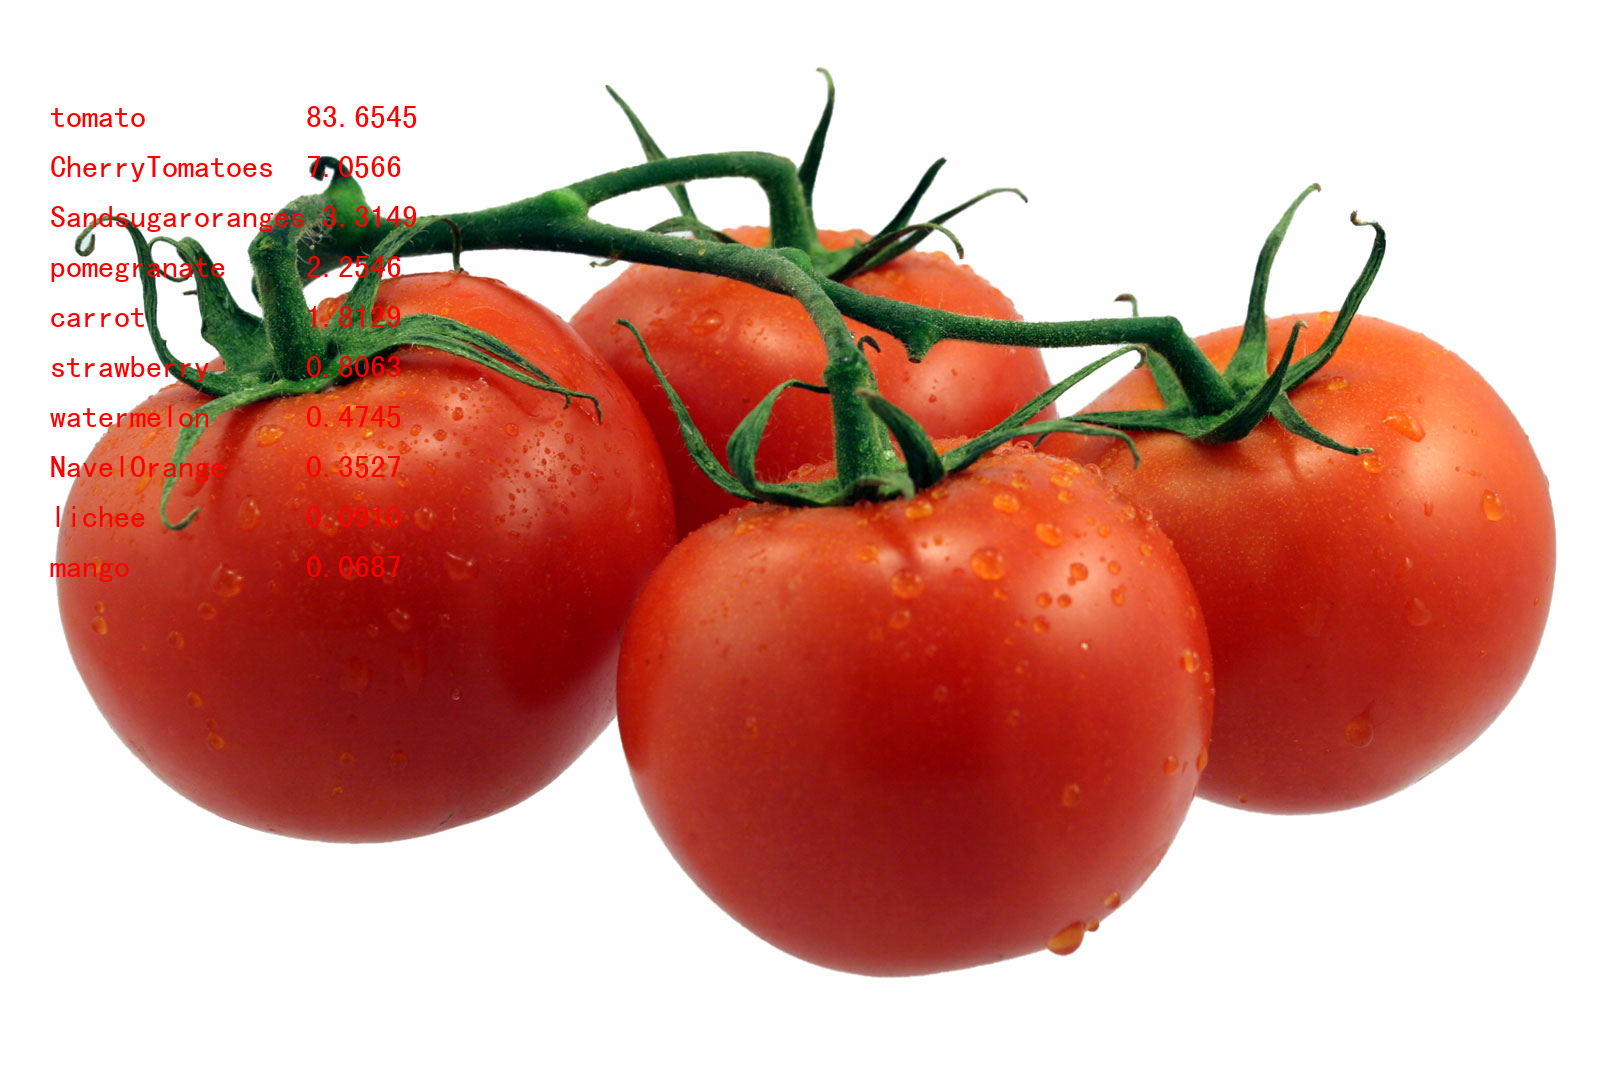

In [340]:
img_pil

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

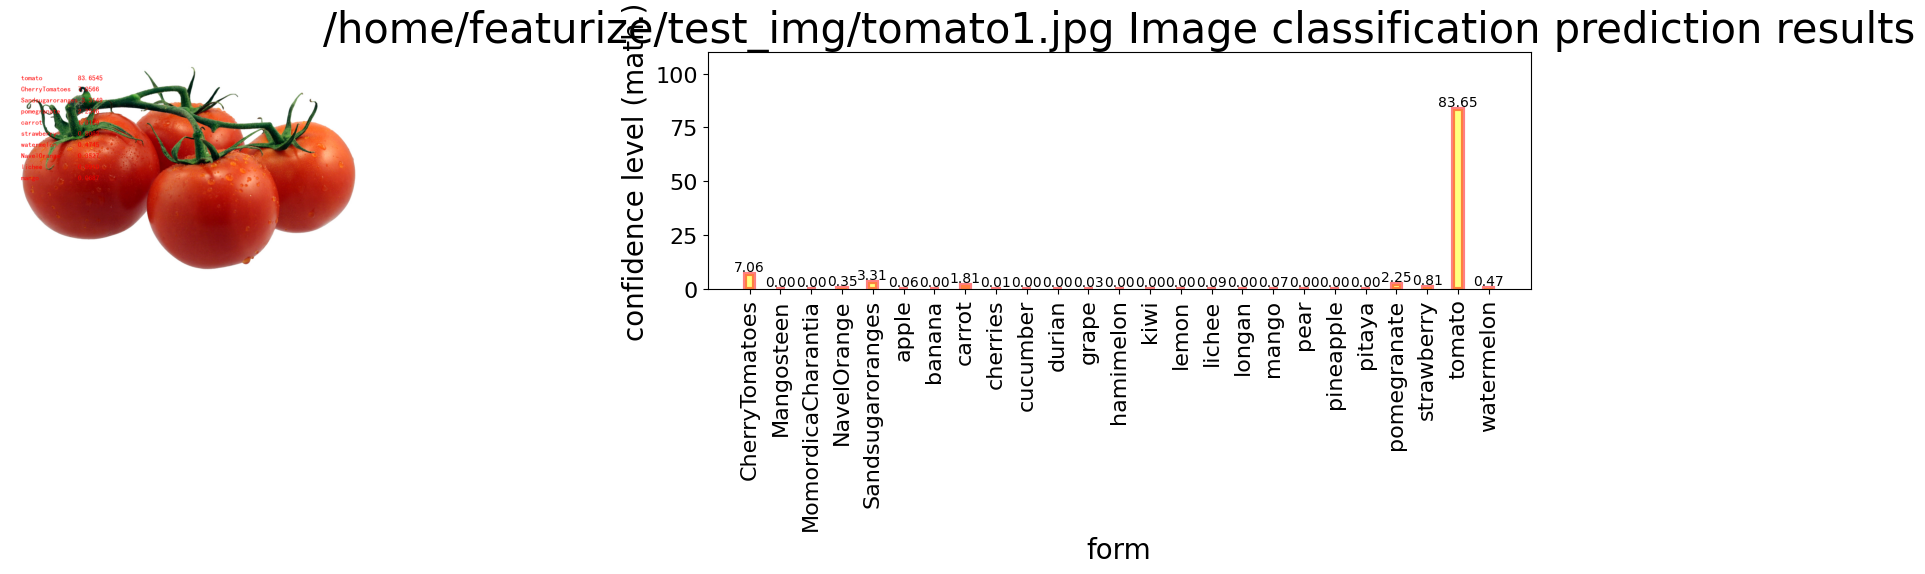

In [341]:
fig = plt.figure(figsize=(18,6))

# Plotting left-forecasting graphs
ax1 = plt.subplot(1,2,1)
ax1.imshow(img_pil)
ax1.axis('off')

# Plot right - bar chart
ax2 = plt.subplot(1,2,2)
x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
ax2.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', lw=3)
plt.bar_label(ax, fmt='%.2f', fontsize=10) 
plt.title('{} Image classification prediction results'.format(img_path), fontsize=30)
plt.xlabel('form', fontsize=20)
plt.ylabel('confidence level (math.)', fontsize=20)
plt.ylim([0, 110]) 
ax2.tick_params(labelsize=16) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig.savefig('output/Forecast Chart + Bar Chart.jpg')

### Tabular output of forecast results

In [349]:
pred_df = pd.DataFrame() # Table of projected results
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] # Access to category names
    label_idx = int(pred_ids[i]) # Get category number
    confidence = confs[i] * 100 # Getting Confidence
    pred_df = pred_df._append({'Class':class_name, 'Class_ID':label_idx, 'Confidence(%)':confidence}, ignore_index=True) # 预测结果表格添加一行
display(pred_df) # Presentation of the table of predicted results

,Class,Class_ID,Confidence(%)
0,tomato,23,83.654517
1,CherryTomatoes,0,7.056604
2,Sandsugaroranges,4,3.314941
3,pomegranate,21,2.254623
4,carrot,7,1.812865
5,strawberry,22,0.806277
6,watermelon,24,0.474478
7,NavelOrange,3,0.352711
8,lichee,15,0.091042
9,mango,17,0.068677


# Predictive video files

In [382]:
def pred_single_frame(img, n=5):
    '''
    Input camera frame bgr-array, output image bgr-array of the first n image classification prediction results
    '''
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR to RGB
    img_pil = Image.fromarray(img_rgb) # array to pil
    input_img = test_transform(img_pil).unsqueeze(0).to(device) # Pre-processing
    pred_logits = model(input_img) # Perform forward prediction to get logit prediction scores for all categories
    pred_softmax = F.softmax(pred_logits, dim=1) 
    
    top_n = torch.topk(pred_softmax, n) # Take the n results with the highest confidence level
    pred_ids = top_n[1].cpu().detach().numpy().squeeze() 
    confs = top_n[0].cpu().detach().numpy().squeeze() 
    
    # Write on the image
    draw = ImageDraw.Draw(img_pil)
    # Write on the image
    for i in range(len(confs)):
        pred_class = idx_to_labels[pred_ids[i]]
        text = '{:<15} {:>.3f}'.format(pred_class, confs[i])
        # Text coordinates, font, rgba colour
        draw.text((50, 100 + 50 * i), text, font=font, fill=(255, 0, 0, 1))
        
    img_bgr = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR) # RGB to BGR
        
    return img_bgr, pred_softmax

In [383]:
import os
import time
import shutil
import tempfile
from tqdm import tqdm

import cv2
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # Used to display the negative sign normally
plt.rcParams['font.sans-serif']=['SimHei']  # Used to display Chinese labels normally
import gc

import torch
import torch.nn.functional as F
from torchvision import models

import mmcv


In [384]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda:0


In [385]:
# Back-end drawing, not displayed, only saved
import matplotlib
matplotlib.use('Agg')

In [386]:
idx_to_labels = np.load('/home/featurize/idx_to_labels.npy', allow_pickle=True).item()

In [387]:
model = torch.load('/home/featurize/fruittestpytorch/best-0.675.pth')
model = model.eval().to(device)

## Input and output video paths

In [388]:
input_video = '/home/featurize/test_img/fruit.mp4'
output_path = '/home/featurize/output/output_pred.mp4'

## Original image + prediction result text

In [389]:
# Create a temporary folder to store the results of each frame
temp_out_dir = time.strftime('%Y%m%d%H%M%S')
os.mkdir(temp_out_dir)
print('Create a temporary folder {} for storing per-frame predictions'.format(temp_out_dir))

Create a temporary folder 20240226200730 for storing per-frame predictions


In [390]:
# Read in the video to be predicted
imgs = mmcv.VideoReader(input_video)

prog_bar = mmcv.ProgressBar(len(imgs))

# Frame-by-frame processing of video
for frame_id, img in enumerate(imgs):
    
    ## Handling of single frames
    img, pred_softmax = pred_single_frame(img, n=5)

    # Save the processed frame to the /tmp directory.
    cv2.imwrite(f'{temp_out_dir}/{frame_id:06d}.jpg', img)
    
    prog_bar.update() # Update progress bar

# String each frame into a video file
mmcv.frames2video(temp_out_dir, output_path, fps=imgs.fps, fourcc='mp4v')

shutil.rmtree(temp_out_dir) # Delete the temporary folder where each frame is stored
print('Delete the temporary folder', temp_out_dir)
print('Video has been generated', output_path)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 279/279, 58.2 task/s, elapsed: 5s, ETA:     0s[                                                  ] 0/279, elapsed: 0s, ETA:
Delete the temporary folder 20240226200730
Video has been generated /home/featurize/output/output_pred.mp4
